# Differential Equations PSet 545
Vyom Raval

Fri, Feb 3, 2023, NEURO545 Winter 2023

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
First order ODE defined by:
$\frac{dx}{dt}=y-\alpha \cdot x$

In [32]:
x_init = 0;				# initial value of x
alpha = 20;				# rate constant for decay of x (in 1/sec)
TimeStep = 0.001;		# time step for difference equation (in sec)
PrePts = 200;			# points before step in y
StmPts = 400;			# number of time points that y is active
NumPts = 1000;			# total points to simulate
time = (np.arange(NumPts)-PrePts)*TimeStep # vector of times, with zero at step onset
yInf = 20;              # amplitude of step input

x = np.zeros(NumPts)	# initialize x
x[0] = x_init


# initialize y; in this case y is a simple step
y = np.zeros(NumPts)
y[PrePts:PrePts + StmPts] = yInf

In [33]:
# Simulate x
for t in range(1, NumPts):
    x[t] = x[t-1] + TimeStep*(y[t-1] - alpha*x[t-1])

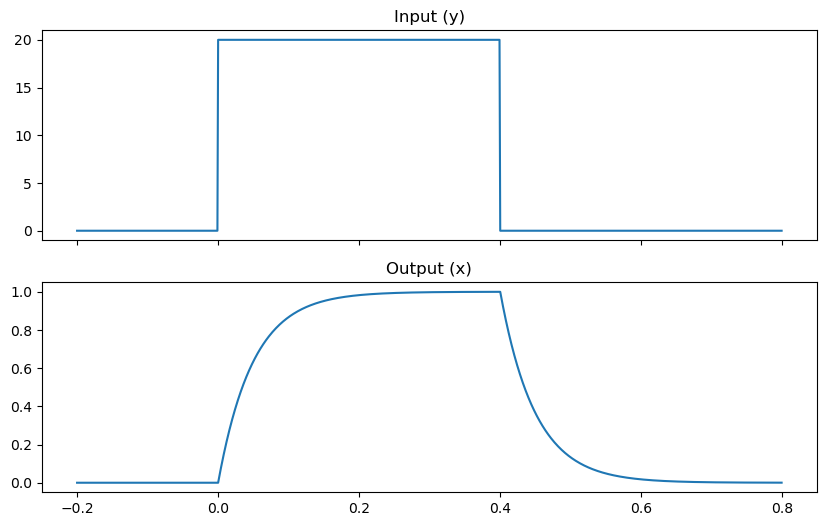

In [34]:
f, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax = axs[0]
ax.plot(time, y)
ax.set_title('Input (y)')

ax = axs[1]
ax.plot(time, x)
ax.set_title('Output (x)');

In [35]:
# Function to simulate x
def simulate_x(y, x_init, alpha, TimeStep):
    x = np.zeros(len(y))	# initialize x
    x[0] = x_init
    for t in range(1, len(y)):
        x[t] = x[t-1] + TimeStep*(y[t-1] - alpha*x[t-1])
    return x

### Q1.1: Effect of rate constant alpha

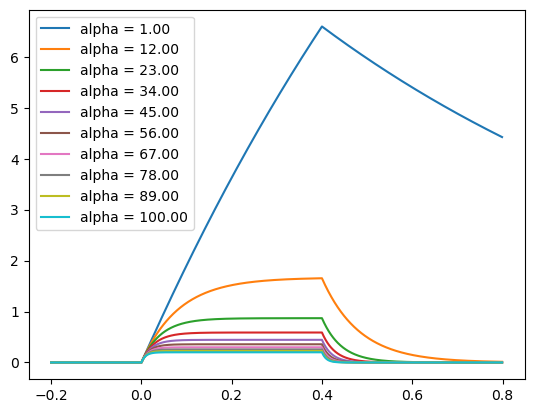

In [36]:
# Simulate for range of alpha values
alpha_vals = np.linspace(1, 100, 10)

for alpha in alpha_vals:
    x = simulate_x(y, x_init, alpha, TimeStep)
    plt.plot(time, x, label=f'alpha = {alpha:.2f}')
plt.legend();

The lower the rate constant, the slower the rising phase and decay of the output, and the greater the peak amplitude.

### Q1.2 Amplitudes: what is the steady state value of x?

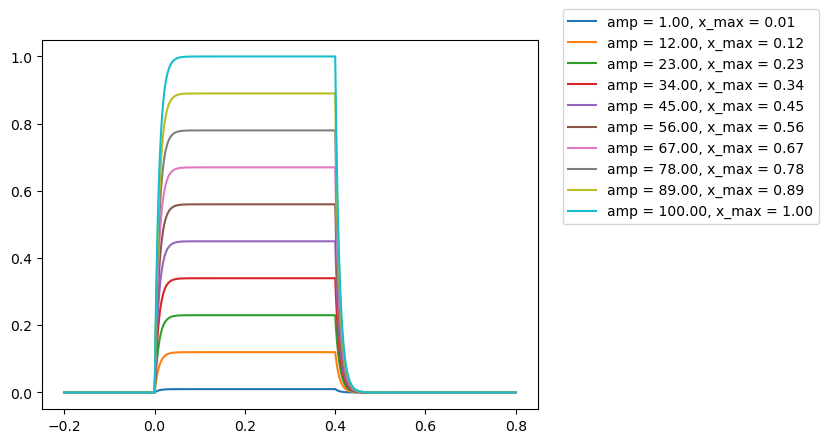

In [37]:
# Series of amplitudes
yInf_vals = np.linspace(1, 100, 10)
for yInf in yInf_vals:
    y[PrePts:PrePts + StmPts] = yInf
    x = simulate_x(y, x_init, alpha, TimeStep)
    plt.plot(time, x, label=f'amp = {yInf:.2f}, x_max = {x.max():.2f}')
plt.legend(loc=(1.05, 0.5));

The steady state value is 1/100th of the amplitude.

In [ ]:
np.nonzero()

In [62]:
# Analytical solution
# RIP I was not able to get this to work

def x_analytical(y, x_init, alpha, time):
    # y_max = y.max()
    # stim_time = time[y==y_max][-1]
    # stim_time = np.argwhere(y==y_max)[-1][0]*TimeStep
    # c = x_init * alpha + y_max - y_max*np.exp(alpha*stim_time)
    # return (y_max*(np.exp(alpha*stim_time)-1) + c) / (alpha*np.exp(alpha*time))
    k_a = y.max()/alpha
    arr_x = np.zeros(len(time))
    y_non_zero = np.nonzero(y)
    y_non_zero  = y_non_zero[0]
    arr_x[y_non_zero] = (k_a) - (k_a + x_init)*np.exp(-alpha*time[y_non_zero])
    arr_x[y_non_zero[-1]:] = -arr_x[y_non_zero[-1]]*np.exp(-alpha*time[y_non_zero[-1]:]) # How to do part after pulse offset???
    return arr_x
#     filter = np.exp(-alpha*time)
#     return np.convolve(filter, y, mode='same')

In [63]:
x_init = 0;				# initial value of x
alpha = 20;				# rate constant for decay of x (in 1/sec)
TimeStep = 0.001;		# time step for difference equation (in sec)
yInf = 20;              # amplitude of step input
y[PrePts:PrePts + StmPts] = yInf

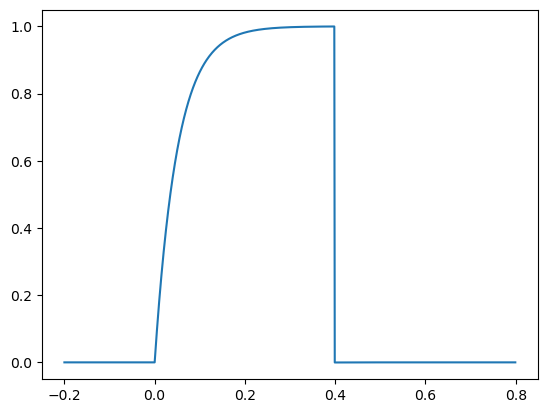

In [64]:
plt.plot(time, x_analytical(y, x_init, alpha, time), label='analytical')

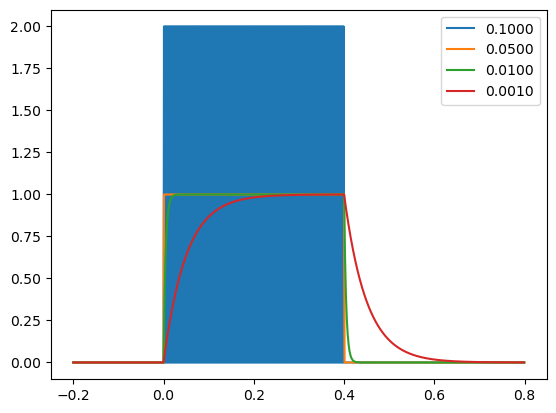

In [10]:
for TimeStep in [0.1, 0.05, 0.01, 0.001]:
    plt.plot(time, simulate_x(y, x_init, alpha, TimeStep), label=f'{TimeStep:.4f}')
plt.legend();

TimeStep of 0.1 or more is numerically unstable

## Q2: x now has spontaneous rate of activation
$\frac{dx}{dt}=y + x_{inf} - \alpha \cdot x$

In [11]:
xInf = 1
x_init = xInf/alpha # New initial condition

In [12]:
def simulate_x2(y, x_init, alpha, xInf, TimeStep):
    x = np.zeros(len(y))	# initialize x
    x[0] = x_init
    for t in range(1, len(y)):
        x[t] = x[t-1] + TimeStep*(y[t-1] - alpha*x[t-1] + xInf)
    return x

In [13]:
x2 = simulate_x2(y, x_init, alpha, xInf, TimeStep)

(0.0, 1.2)

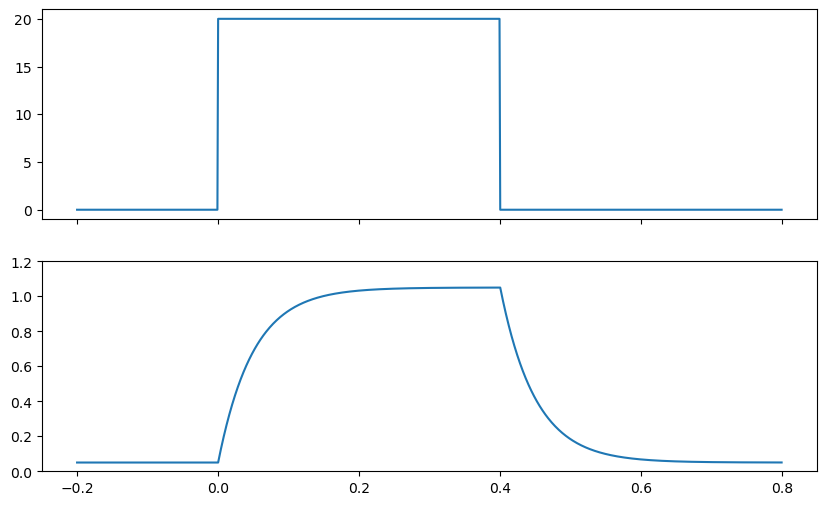

In [14]:
f, axs  = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax = axs[0]
ax.plot(time, y)

ax = axs[1]
ax.plot(time, x2);
ax.set_ylim(0, 1.2)

### 2.1, 2.2 How does the solution differ?

There is a constant baseline level of activity before the input and after the output decays because of the constant term xInf.

### 2.3 Why is xInf/alpha a reasonable initial condition

Because it makes the derivative zero in the absence of input, keeping the output at that steady state initial value

### New inputs

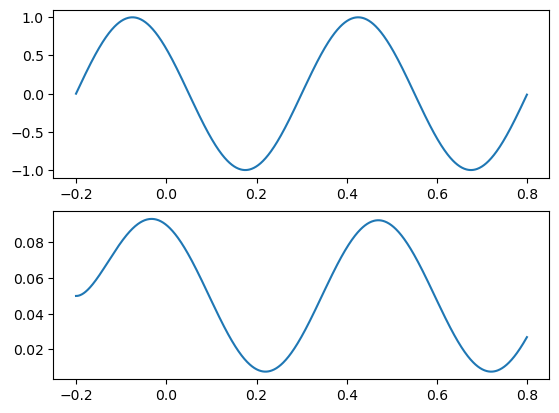

In [15]:
y = np.sin(4*np.pi*np.arange(NumPts)/NumPts)
x2 = simulate_x2(y, x_init, alpha, xInf, TimeStep)
plt.subplot(2, 1, 1)
plt.plot(time, y)
plt.subplot(2, 1, 2)
plt.plot(time, x2);

## Q3: baseline activation

### 3.1, 3.2 Nature of solution, changing frequency, adding two frequency components

The solution is sinusoidal

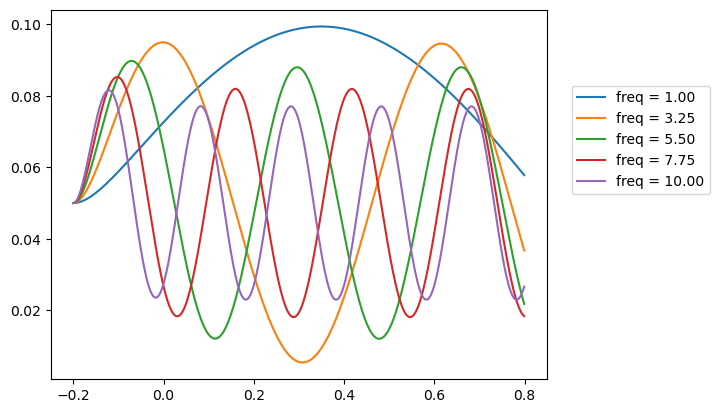

In [16]:
freq_vals = np.linspace(1, 10, 5)
for freq in freq_vals:
    y = np.sin(freq*np.pi*np.arange(NumPts)/NumPts)
    x2 = simulate_x2(y, x_init, alpha, xInf, TimeStep)
    plt.plot(time, x2, label=f'freq = {freq:.2f}')
plt.legend(loc=(1.05, 0.5));

The amplitude gets smaller and frequency of output goes higher as frequency of input is increased.

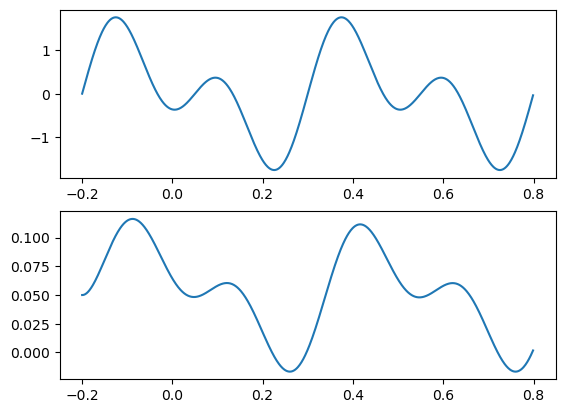

In [17]:
y = np.sin(4*np.pi*np.arange(NumPts)/NumPts) + np.sin(8*np.pi*np.arange(NumPts)/NumPts)
x2 = simulate_x2(y, x_init, alpha, xInf, TimeStep)
plt.subplot(2, 1, 1)
plt.plot(time, y)
plt.subplot(2, 1, 2)
plt.plot(time, x2);

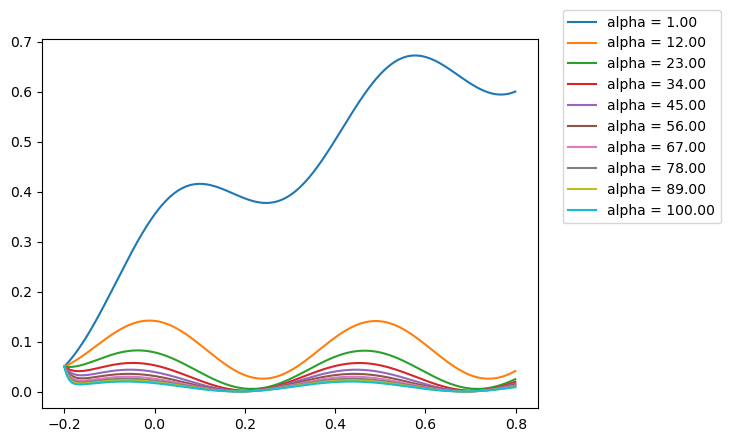

In [18]:
alpha_vals = np.linspace(1, 100, 10)
y = np.sin(4*np.pi*np.arange(NumPts)/NumPts)
for alpha in alpha_vals:
    x2 = simulate_x2(y, x_init, alpha, xInf, TimeStep)
    plt.plot(time, x2, label=f'alpha = {alpha:.2f}')
plt.legend(loc=(1.05, 0.5));

With lower time constants, the signal rises more as there is less decay, and its frequency becomes lower

### 3.4 What is a system with this dynamics doing to the input?

This system is applying an exponential decay filter to the input, with rate constant alpha.

## Q4: HH equations

$\frac{dm}{dt} = \alpha \cdot (1 - m) - \beta \cdot m$

Simplifying above, we get
$\frac{dm}{dt} = \alpha - (\alpha + \beta) m$

The time constant appears to be $\alpha + \beta$

The baseline activation is $\alpha$

In [19]:
NumPts = 1000
TimeStep = 0.00001
arr_m = np.zeros(NumPts)
arr_m[0] = 1 # initial condition
alpha_m = 200 # active->inactive rate constant
beta_m = 300 # inactive->active rate constant


def dm_dt(arr_m, alpha_m, beta_m, NumPts, TimeStep):
    for t in range(1, NumPts):
        arr_m[t] = arr_m[t-1] + TimeStep*(alpha_m*(1-arr_m[t-1]) - beta_m*arr_m[t-1])
    return arr_m

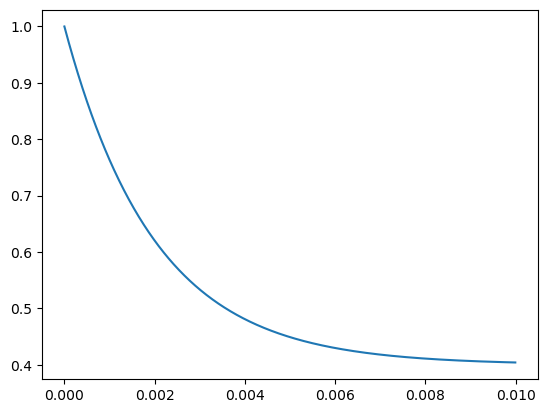

In [20]:
time = np.arange(NumPts)*TimeStep
arr_m = dm_dt(arr_m, alpha_m, beta_m, NumPts, TimeStep)
plt.plot(time, arr_m);

### Make rate constants voltage dependent

In [21]:
PrePts = 200
StimPts = 400
arr_m[0] = 0 # initial condition

# Intialize voltage step from -60 to -40 for 400 points
arr_V = np.zeros(NumPts) -60
arr_V[PrePts:PrePts+StimPts] = -40

# Compute alpha from HH parameters
arr_A = np.zeros(NumPts)
arr_A = -100*(arr_V+30) / (np.exp(-(arr_V+30)/10) - 1)

# Compute beta from HH parameters
arr_B = np.zeros(NumPts)
arr_B = 4000*np.exp(-(arr_V+55)/18)

def dm_dt_V(arr_m, arr_A, arr_B, NumPts, TimeStep):
    for t in range(1, NumPts):
        arr_m[t] = arr_m[t-1] + TimeStep*(arr_A[t-1]*(1-arr_m[t-1]) - arr_B[t-1]*arr_m[t-1])
    return arr_m

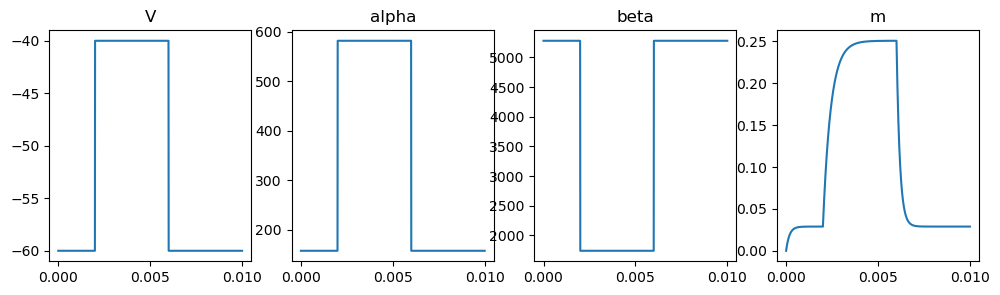

In [22]:
arr_m = dm_dt_V(arr_m, arr_A, arr_B, NumPts, TimeStep)
f, axs = plt.subplots(ncols=4, figsize=(12, 3))
ls_ts = [arr_V, arr_A, arr_B, arr_m]
for idx, ax in enumerate(axs):
    ax.plot(time, ls_ts[idx])
    ax.set_title(['V', 'alpha', 'beta', 'm'][idx])

This is applying a voltage clamp to the m gate. Experimentally, this is done through a feedback loop that measures the current and inputs current to maintain the clamped voltage.

The solution has different rates of rise and decay. 

### Full HH system

In [23]:
TimeStep = 0.01
dt = TimeStep
tFinal = 100
time = np.arange(0, tFinal, dt)

# Define equation parameters
gkmax = 36
gnamax = 120
gl = 0.3
Vk = 12
Vl = -10.613
Vna = -115

# Define voltage steps
Vexp = np.array([-50,-40,-20,-10,0,10,20,30,40]) + 1
nexps = len(Vexp)
# Initialize variables
arr_m = np.zeros((nexps, len(time)))
arr_n = np.zeros((nexps, len(time)))
arr_h = np.zeros((nexps, len(time)))
arr_V = np.zeros((nexps, len(time)))

In [24]:
def alpha(c1, c2, c3, c4, V):
    return c1*(V+c2)/(np.exp((V+c3)/c4)-1)

def beta(c1, c2, V):
    return c1*np.exp(V/c2)

In [25]:
# Loop over set of voltage steps
for idx_V, Vin in enumerate(Vexp):
    # Construct voltage clamp input
    Vclamp = np.zeros(len(time))
    Vclamp[500:] = Vin 

    for t in range(len(time)-1):
        arr_V[idx_V, t] = Vclamp[t]
        

        # Update alphas and betas at each time step
        alphaM = alpha(0.1, 25, 25, 10, arr_V[idx_V, t])
        betaM = beta(4, 18, arr_V[idx_V, t])
        alphaN = alpha(0.01, 10, 10, 10, arr_V[idx_V, t])
        betaN = beta(0.125, 80, arr_V[idx_V, t])
        alphaH = 0.07*np.exp(arr_V[idx_V, t]/20)
        betaH = 1/(np.exp((arr_V[idx_V, t]+30)/10)+1)

        # Update m, n, h at each time step
        dm = dt * (-arr_m[idx_V, t]*(alphaM+betaM) + alphaM)
        arr_m[idx_V, t+1] = arr_m[idx_V, t] + dm
        dn = dt * (-arr_n[idx_V, t]*(alphaN+betaN) + alphaN)
        arr_n[idx_V, t+1] = arr_n[idx_V, t] + dn
        dh = dt * (-arr_h[idx_V, t]*(alphaH+betaH) + alphaH)
        arr_h[idx_V, t+1] = arr_h[idx_V, t] + dh

In [26]:
# Define plotting function
def plot_HH_clamp(arr_m, arr_n, arr_h, arr_V, time, Vexp):
    f, axs = plt.subplots(nrows=4, figsize=(10, 12), sharex=True)
    ls_ts = [arr_V, arr_m, arr_n, arr_h]
    for idx, ax in enumerate(axs):
        for i in range(nexps):
            ax.plot(time, ls_ts[idx][i], label=f'V = {Vexp[i]}')

        ax.set_title(['V', 'm', 'n', 'h'][idx])
        
        if idx == 3:
            ax.legend(loc=(1.05, 0.5))

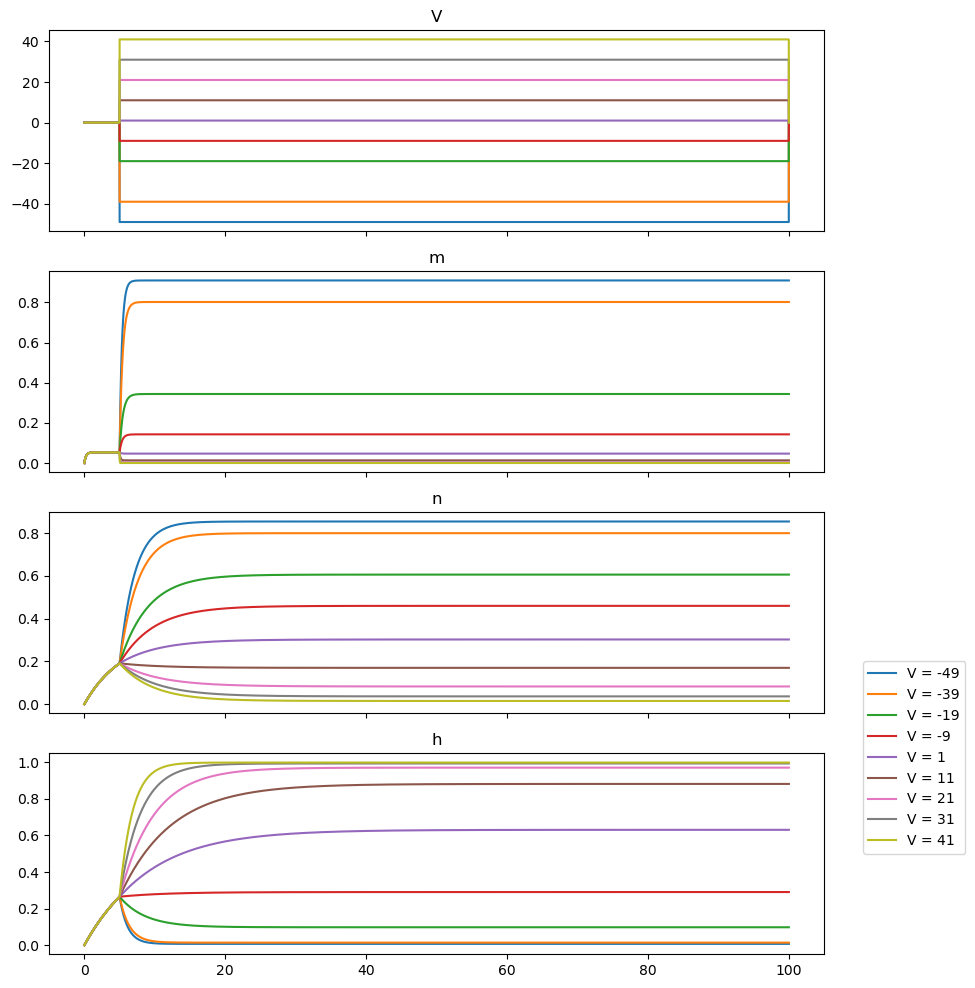

In [27]:
plot_HH_clamp(arr_m, arr_n, arr_h, arr_V, time, Vexp)

### 4.1: Compare dynamics

As V gets more positive (depolarized), m and n values shoot up while h values are suppressed. 

m has the fastest kinetics, followed by h and then n.

Unlike m, n and h have a constantly rising value in the absence of input.

### Current clamp

In [28]:
TimeStep = 0.01;
tFinal = 500;
time = np.arange(0, tFinal, TimeStep)

# Integrate equations using Euler method
arr_m = np.zeros(len(time))
arr_n = np.zeros(len(time))
arr_h = np.zeros(len(time))
arr_V = np.zeros(len(time))

# Nonzero initial conditions
arr_n[0] = 0.6
arr_h[0] = 0.3

# Constants
gkmax = 36  #*0.01 * 1000 ; % cm--> 10^7 g --> 10^-2 dt --> 10^3
gnamax = 120
gl = 0.3
Vk = 12
Vna = -115
Vl = -10.613
C = 1.0
#
# We are now in current clamp-- voltage can vary according to its own dynamics,
# but we will drive it with an input current. Let's put in a simple current
# input, just a constant:
#
Iext = np.zeros(len(time));
Iext[500:] = -7;   # starting with a constant: don't forget to make the current negative...
#
# Now integrate to obtain the inactivation variables...
#
def full_HH(arr_m, arr_n, arr_h, arr_V, time, Iext):
    for i in range(len(time)-1):
        alpham = 0.1*(arr_V[i]+25)/(np.exp((arr_V[i]+25)/10)-1)
        betam = 4*np.exp(arr_V[i]/18)
        alphan = 0.01*(arr_V[i]+10)/(np.exp((arr_V[i]+10)/10)-1)
        betan = 0.125*np.exp(arr_V[i]/80)
        alphah = 0.07*np.exp(arr_V[i]/20)
        betah = 1./(np.exp((arr_V[i]+30)/10)+1)
        dm = dt * (-arr_m[i]*(alpham + betam) + alpham)
        arr_m[i+1] = arr_m[i] + dm
        dn = dt * (-arr_n[i]*(alphan + betan) + alphan)
        arr_n[i+1] = arr_n[i] + dn
        dh = dt * (-arr_h[i]*(alphah + betah) + alphah)
        arr_h[i+1] = arr_h[i] + dh
        Ik = gkmax*arr_n[i]**4*(arr_V[i] - Vk)
        Ina = gnamax*arr_m[i]**3*arr_h[i]*(arr_V[i]-Vna)
        Il = gl*(arr_V[i] - Vl)
        arr_V[i+1] = arr_V[i] + dt*(Iext[i] - Ik - Ina - Il)/C   # This is the voltage equation from HH 1952

    return arr_m, arr_n, arr_h, arr_V

arr_m, arr_n, arr_h, arr_V = full_HH(arr_m, arr_n, arr_h, arr_V, time, Iext)

Text(0, 0.5, 'h')

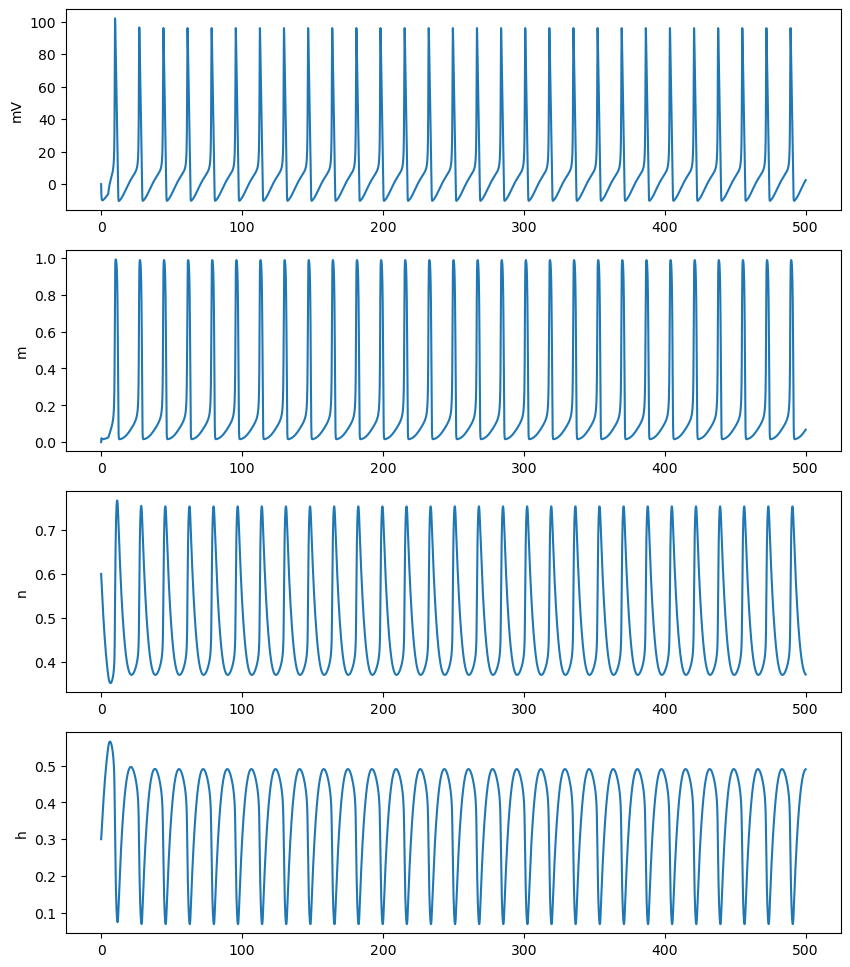

In [29]:
f, axs = plt.subplots(nrows=4, figsize=(10, 12))
axs[0].plot(time, -arr_V)
axs[0].set_ylabel('mV')

axs[1].plot(time, arr_m)
axs[1].set_ylabel('m')

axs[2].plot(time, arr_n)
axs[2].set_ylabel('n')

axs[3].plot(time, arr_h)
axs[3].set_ylabel('h')

### 4.2 Nonlinearities

Ik is nonlinear as the gating variable n is rasied to the 4th power.

Ina is nonlinear as the gating variable m is raised to the 3rd power and multiplied by the gating variable h. All these gating variables are time dependent themselves.

Because of these nonlinearities, we get the all-or-nothing spikes of same amplitude, as well as a refractory period.

### 4.3 Play with Iext

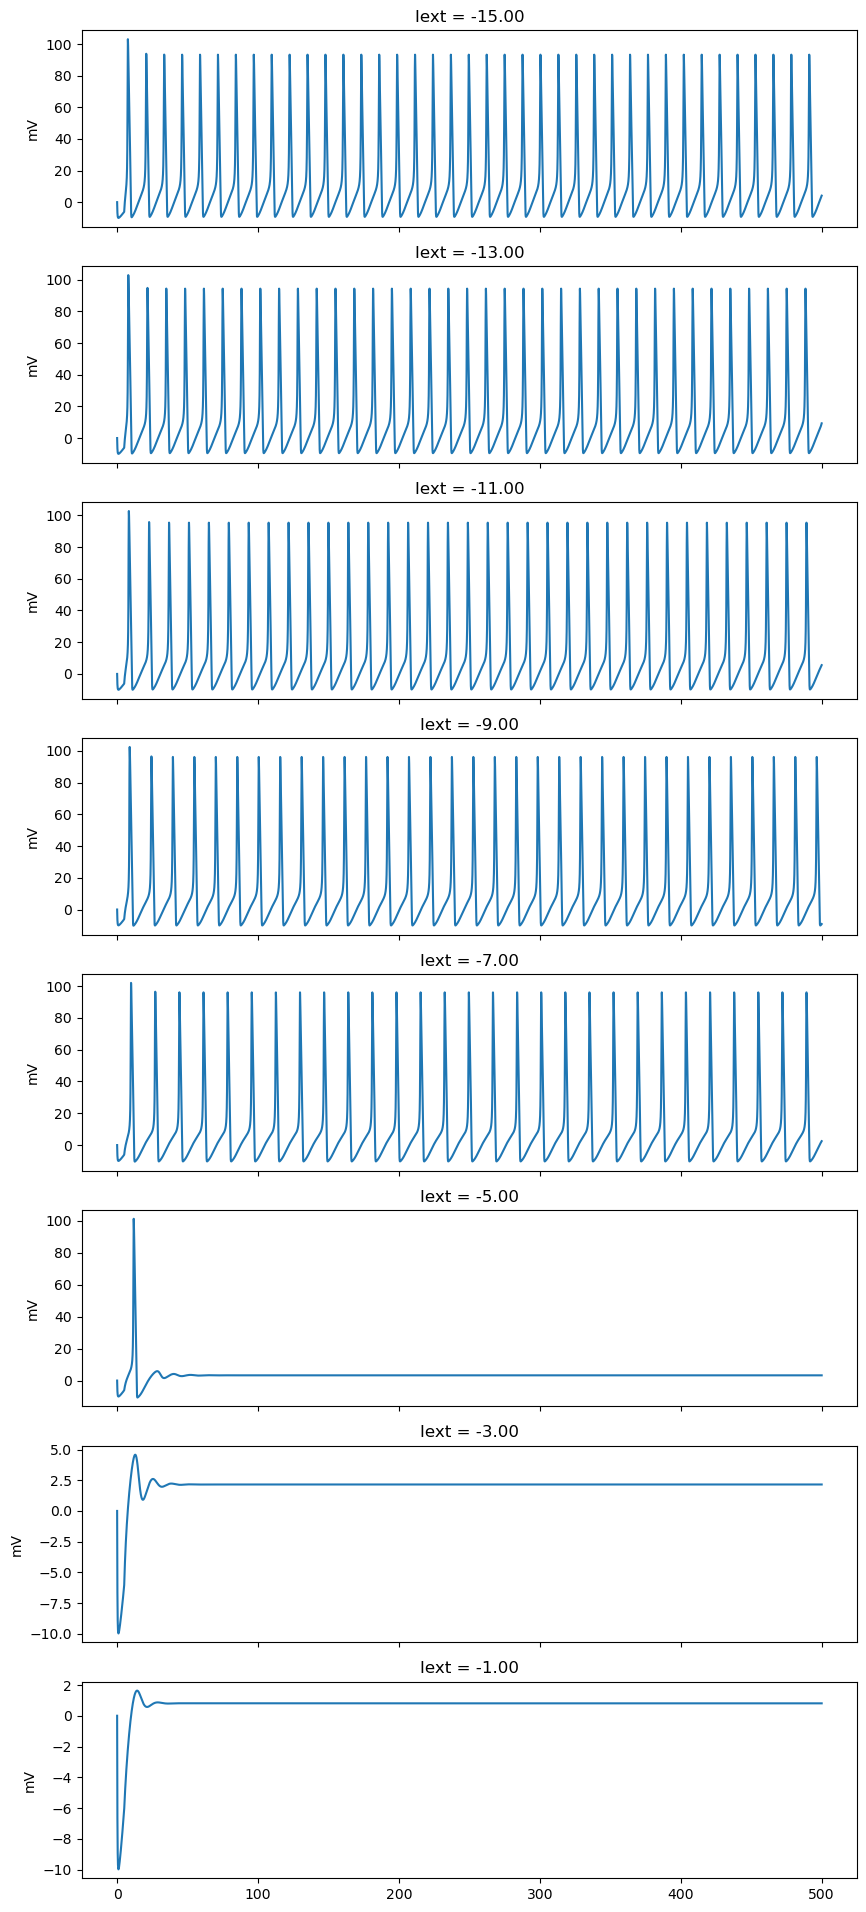

In [30]:
input_IextValues = np.arange(-15, 0, 2)
nexps = len(input_IextValues)
f, axs = plt.subplots(nrows=nexps, figsize=(10, nexps*3), sharex=True)

for idx, IextVal in enumerate(input_IextValues):
    # Initialize
    arr_m = np.zeros(len(time))
    arr_n = np.zeros(len(time))
    arr_h = np.zeros(len(time))
    arr_V = np.zeros(len(time))

    # Nonzero initial conditions
    arr_n[0] = 0.6
    arr_h[0] = 0.3

    Iext = np.zeros(len(time))
    Iext[500:] = IextVal
    arr_m, arr_n, arr_h, arr_V = full_HH(arr_m, arr_n, arr_h, arr_V, time, Iext)
    axs[idx].plot(time, -arr_V, label=IextVal)
    axs[idx].set_ylabel('mV')
    axs[idx].set_title(f'Iext = {IextVal:.2f}')

It seems that firing rate gradually decreases with the decrease in input current amplitude, until repetitive firing ceases completely and the model becomes hyperpolarized.